You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U2proj.

Ex1.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU2proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

# Unit 2 Project: Flipping Metaphorical Coins

**Task**:

Two parts:

1. Propose a data set that's compatible with a pymc betabinomial model. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a betabinomial model using pymc within the colab environment, on a data set of your choice.

<Axes: >

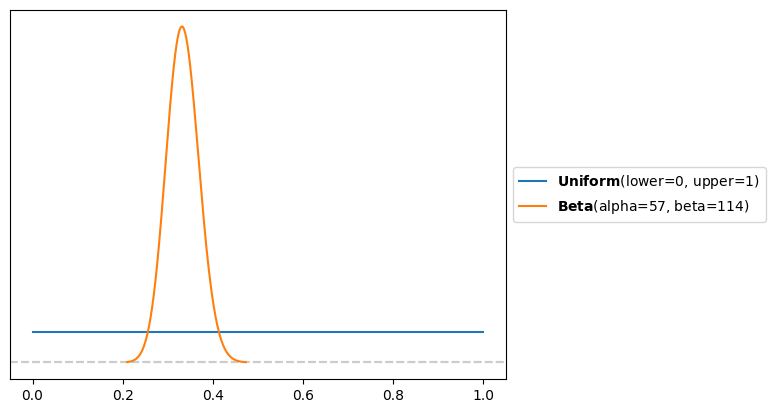

In [18]:
!pip install "preliz[full,notebook]"
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm
pz.Uniform(0,1).plot_pdf()
pz.Beta(alpha=57,beta=114).plot_pdf()

total kickoffs 2023 nfl season - 2698
total returns 2023 nfl season - 590
The return rate of nfl kickoffs in the 2023 season was 21.9%. I believe that with the new dynamic kickoff that return rate will jump 10% to 31.9%. For my likelihood, in week 1 of the nfl season with the new dynamic kickoff there were 114 valid kickoffs with 57 returns

<Axes: >

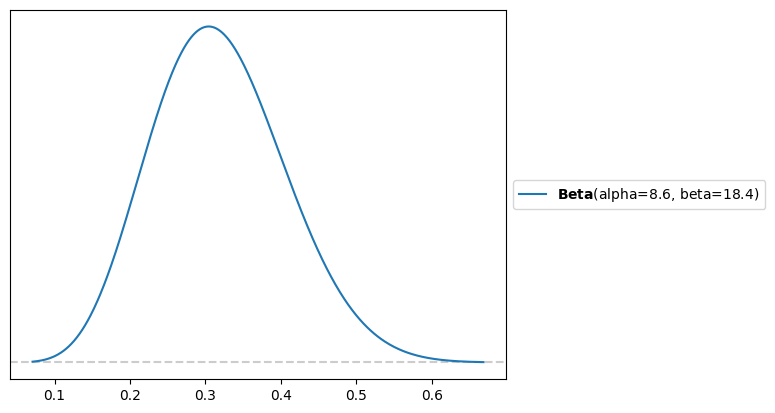

In [19]:
DKRR_prior = pz.Beta(alpha=8.60,beta=18.38)
DKRR_prior_mode = (DKRR_prior.alpha -1)/(DKRR_prior.alpha + DKRR_prior.beta - 2)
DKRR_prior.mean(), DKRR_prior.median(), DKRR_prior_mode
DKRR_prior.plot_pdf()

<Axes: >

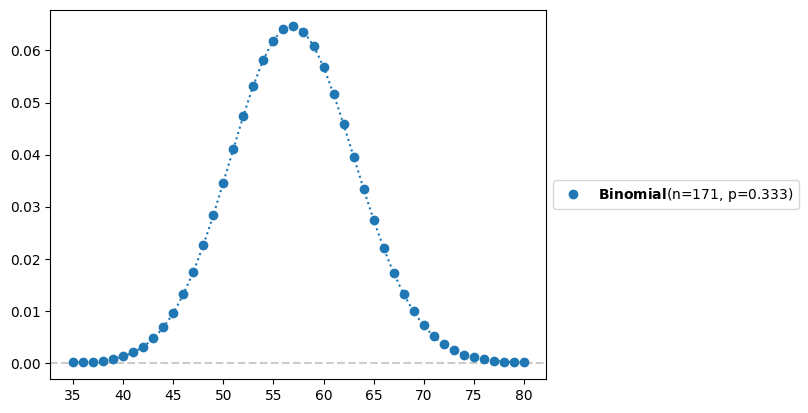

In [20]:
pz.Binomial(n=171, p=57/171).plot_pdf()

<Axes: >

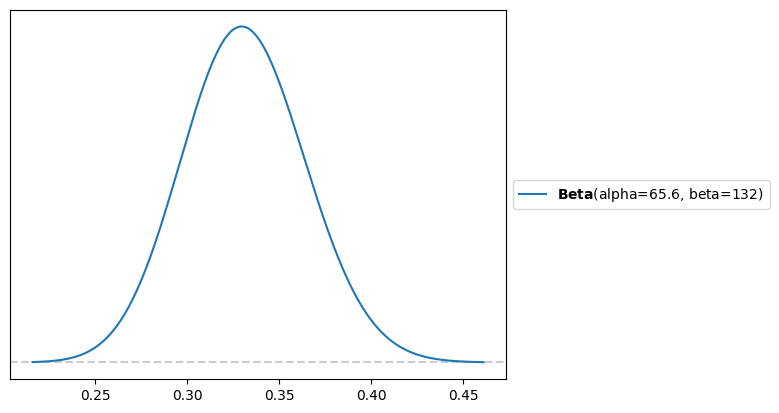

In [21]:
analytic_DKRR = pz.Beta(alpha=8.60+57,beta=18.38+114)
analytic_DKRR.mean()
analytic_DKRR.plot_pdf()

In [16]:
DKRR_returns = np.repeat(1,57)
DKRR_others = np.repeat(0,114)
DKRR_data = np.concatenate([DKRR_returns,DKRR_others])
with pm.Model() as DKRR_model:
  theta = pm.Beta('theta' , alpha=8.60 , beta=18.38)
  y = pm.Bernoulli('y', p = theta, observed = DKRR_data)
  idata_DKRR = pm.sample(1000)

<Axes: title={'center': 'theta'}>

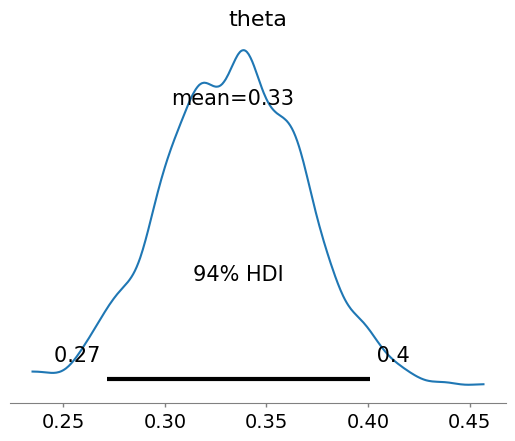

In [14]:
az.plot_posterior(idata_DKRR)

In [24]:
pm.sample_posterior_predictive(idata_DKRR, model=DKRR_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [25]:
stacked_DKRR = az.extract(idata_DKRR, group="posterior_predictive")
stacked_DKRR.sel(sample=0).sel(draw=0).y.to_series().values

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1])

Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Anything that can be looked at as either being yes or no, success or faliure, can be modeled with the betabinomial model. Examples: BAP3 introduces the betabinomial model with coin flipping, and Richard McElreath starts with guessing the proportion of surface water covering a planet in his book Statistical Rethinking.

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

-  Use your best idea now; you could use the same context the whole course and learn everything you need to know. Its more than ok to use the same context, or even some of the same data, from unit to unit.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit2NotesAK *is* your example! You are expected to be somewhere between a half and a quarter as detailed--but more is always welcome.